In [1]:
import numpy as np
np.random.seed(0)

In [2]:


def func(val):
    out = np.empty(len(val))
    for i in range(len(val)):
        out[i] = 1. / val[i]
    return out
arr = np.random.randint(1, 10, 10, np.int64)
func(arr)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ,
       0.25      , 0.16666667, 0.33333333, 0.2       , 0.125     ])

In [3]:
big = np.random.randint(1,1000000,1000000)
%timeit func(big)
%timeit 1. / big

KeyboardInterrupt: 

In [4]:
a = np.arange(5)
print(a)
b = np.arange(1,6)
print(b)
print(a / b)

[0 1 2 3 4]
[1 2 3 4 5]
[0.         0.5        0.66666667 0.75       0.8       ]


In [5]:
2 ** np.arange(9).reshape([3,3])

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [6]:
test_arr = np.arange(1,16)
test_arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [7]:
abs(-test_arr[:, np.newaxis][2] * test_arr)

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45])

In [8]:
(test_arr * 2) - 1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [9]:
t = np.linspace(0, np.pi, 3)
print(t)

[0.         1.57079633 3.14159265]


In [10]:
np.sin(t)

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

### СОХРАНЯЕМ ПАМЯТЬ 
#### в случае бальших массивов

In [11]:
y = np.zeros(10, dtype=np.int32)
x = np.arange(5)


In [12]:
a = [1, 2, 3]
b = [2, 3, 4]
print(np.subtract(b,a))

[1 1 1]


#### Это хуже

In [13]:
bad_y = y
bad_y[::2] = 2**x
print(bad_y)

[ 1  0  2  0  4  0  8  0 16  0]


#### Чем это

In [14]:
good_y = y
np.power(2, x, out = good_y[::2])
print(good_y)

[ 1  0  2  0  4  0  8  0 16  0]


In [15]:
x = np.arange(1,10, dtype=np.uint64)
print("X: ",x)
print("Y: ", y)
print("Sum Y: ", np.add.reduce(y))
print("Multiply X: ", np.multiply.reduce(x))

X:  [1 2 3 4 5 6 7 8 9]
Y:  [ 1  0  2  0  4  0  8  0 16  0]
Sum Y:  31
Multiply X:  362880


In [16]:
print("Sum: ")
print(np.add.reduce(x))
print(np.add.accumulate(x))
print("Multiply: ")
print(np.multiply.reduce(x))
print(np.multiply.accumulate(x))

Sum: 
45
[ 1  3  6 10 15 21 28 36 45]
Multiply: 
362880
[     1      2      6     24    120    720   5040  40320 362880]


In [17]:
def fact(num):
    res = [1, 1]
    for i in range(2,num):
        res.append(np.add.reduce(res[i - 2: i]))
    return res

In [18]:
fact(20)

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

In [19]:
np.multiply.reduce(np.arange(1,21, dtype = np.uint64))

2432902008176640000

In [20]:
np.subtract.accumulate(np.arange(1,20))

array([   1,   -1,   -4,   -8,  -13,  -19,  -26,  -34,  -43,  -53,  -64,
        -76,  -89, -103, -118, -134, -151, -169, -188], dtype=int32)

In [21]:
x = np.ones((5,5), dtype=np.int32)
print(x.shape)
np.add.reduce(x)

(5, 5)


array([5, 5, 5, 5, 5])

In [22]:
a = np.arange(3)
M = np.ones((2,3))

In [23]:
M + a 

array([[1., 2., 3.],
       [1., 2., 3.]])

### Приближено к 0 (что занчит мы центрозовали массив)

In [24]:
rand_x = np.random.random(10)
Xmean = rand_x.mean(0)
print(Xmean)
rand_x -= Xmean
print(rand_x.mean(0))

0.47565344434205903
-2.2204460492503132e-17


In [38]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [35]:
import matplotlib.pyplot as plt

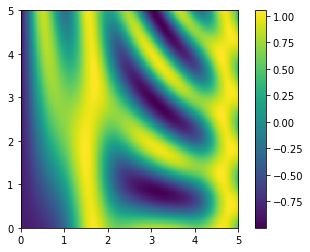

In [36]:
plt.imshow(z, origin="lower", extent=[0,5,0,5], cmap="viridis");
plt.colorbar();

In [42]:
np.shape(z)

(50, 50)

In [55]:
x = np.arange(20)
x = np.reshape(x, (2, 10))
print(x)
x_less = x < 11
print(np.count_nonzero(x_less))
print(np.sum(x_less, axis = 1))


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
11
[10  1]


In [56]:
np.any(x == 1)

True

In [57]:
np.any(x < 0)

False